# COVID hospitalizations in France: year after year

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
)

In [4]:
df = pd.read_csv(covid_url, sep=";", parse_dates=["jour"], infer_datetime_format=True)
df = df.query("sexe == 0")  # sum male/female
df = df[["jour", "hosp", "dc"]]
df.head()

,jour,hosp,dc
0,2020-03-18,2,0
3,2020-03-18,41,11
6,2020-03-18,4,0
9,2020-03-18,3,0
12,2020-03-18,8,0


In [5]:
df2 = df.groupby(by="jour").sum().reset_index()
df2["death"] = df2["dc"] - df2["dc"].shift()
df2 = df2.dropna()
df2["death"] = df2["death"].astype(int)
df2["dayofyear"] = df2.jour.dt.dayofyear
df2.tail()

,jour,hosp,dc,death,dayofyear
694,2022-02-10,32415,106447,310,41
695,2022-02-11,31939,106716,269,42
696,2022-02-12,31522,106877,161,43
697,2022-02-13,31621,106984,107,44
698,2022-02-14,31532,107369,385,45


In [6]:
df2.hosp.max()

33466

In [7]:
def get_final_df(year):
    tdf = df2.query("jour.dt.year == @year")
    tdf = tdf[["dayofyear", "hosp", "death"]].set_index("dayofyear")
    return tdf

In [8]:
df_2020 = get_final_df(2020)
df_2021 = get_final_df(2021)
df_2022 = get_final_df(2022)

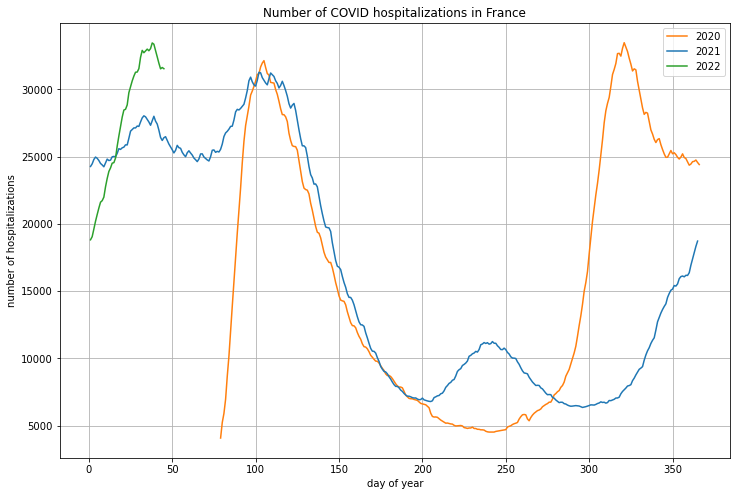

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
df_2020["hosp"].plot(ax=ax, color="tab:orange", label="2020")
df_2021["hosp"].plot(ax=ax, color="tab:blue", label="2021")
df_2022["hosp"].plot(ax=ax, color="tab:green", label="2022")
ax.set_xlabel("day of year")
ax.set_ylabel("number of hospitalizations")
plt.legend()
plt.grid()
plt.title("Number of COVID hospitalizations in France")
plt.savefig("year_after_year.png", dpi=100)
plt.show()